# B1

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

In [72]:
df = pd.read_csv("uber.csv")

In [73]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [75]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [76]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)



In [77]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [78]:
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [79]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [80]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [81]:
df = df.dropna()

In [82]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [83]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')



In [84]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [85]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
              day = df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.year,
              dayofweek = df.pickup_datetime.dt.dayofweek)

In [86]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int64
day                                int64
month                              int64
year                               int64
dayofweek                          int64
dtype: object

In [87]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [88]:
df = df.drop(['pickup_datetime'], axis=1)

In [89]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


<AxesSubplot:xlabel='fare_amount'>

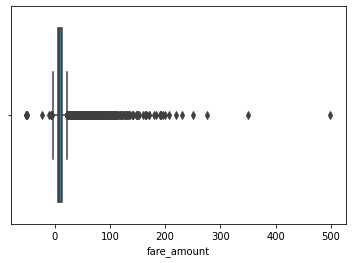

In [90]:
sns.boxplot(x='fare_amount', data = df)

In [91]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 -1.5*IQR
upper = Q3 +1.5*IQR
print("lower: ",lower)
print("upper: ",upper)


lower:  -3.75
upper:  22.25


In [92]:
print("Outliers")
df[(df['fare_amount']<lower) | (df['fare_amount']>upper)]

Outliers


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
6,24.50,-73.961447,40.693965,-73.871195,40.774297,5,7,12,10,2014,6
30,25.70,-73.944815,40.834367,-73.989332,40.721920,4,9,21,5,2011,5
34,39.50,-73.788080,40.642187,-73.865042,40.725997,4,6,4,6,2014,2
39,29.00,-73.992600,40.753172,-73.908508,40.816192,1,17,13,2,2014,3
48,56.80,-73.993498,40.764686,-73.993498,40.764686,1,22,3,1,2013,3
...,...,...,...,...,...,...,...,...,...,...,...
199976,49.70,-73.978225,40.783318,-73.700963,40.705852,1,23,18,10,2011,1
199977,43.50,-73.996671,40.737483,-73.867758,40.897563,1,21,20,11,2012,1
199982,57.33,-73.969204,40.754771,-73.790351,40.643802,1,11,6,8,2014,2
199985,24.00,-74.005089,40.737301,-73.945290,40.774162,5,15,18,4,2015,5


In [93]:
print("old shape", df.shape)
df = df[(df['fare_amount']>=lower) & (df['fare_amount']<=upper)]
print("new shape", df.shape)

old shape (199999, 11)
new shape (182833, 11)


<AxesSubplot:xlabel='fare_amount'>

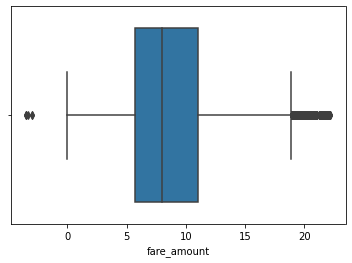

In [94]:
sns.boxplot(x='fare_amount',data=df)

In [95]:
corr_matrix = round(df.corr(),2)
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
fare_amount,1.00,0.00,0.00,-0.00,0.00,0.01,-0.01,0.01,0.03,0.14,0.02
pickup_longitude,0.00,1.00,-0.81,0.84,-0.85,-0.00,0.00,0.00,-0.00,0.01,-0.00
pickup_latitude,0.00,-0.81,1.00,-0.77,0.68,-0.00,-0.00,-0.01,0.00,-0.01,-0.00
dropoff_longitude,-0.00,0.84,-0.77,1.00,-0.91,0.00,0.00,0.00,-0.00,0.01,-0.00
dropoff_latitude,0.00,-0.85,0.68,-0.91,1.00,-0.00,-0.00,-0.01,0.00,-0.01,-0.00
passenger_count,0.01,-0.00,-0.00,0.00,-0.00,1.00,0.01,0.00,0.01,0.00,0.03
hour,-0.01,0.00,-0.00,0.00,-0.00,0.01,1.00,0.01,-0.00,0.00,-0.09
day,0.01,0.00,-0.01,0.00,-0.01,0.00,0.01,1.00,-0.02,-0.01,0.01
month,0.03,-0.00,0.00,-0.00,0.00,0.01,-0.00,-0.02,1.00,-0.12,-0.01
year,0.14,0.01,-0.01,0.01,-0.01,0.00,0.00,-0.01,-0.12,1.00,0.01


<AxesSubplot:>

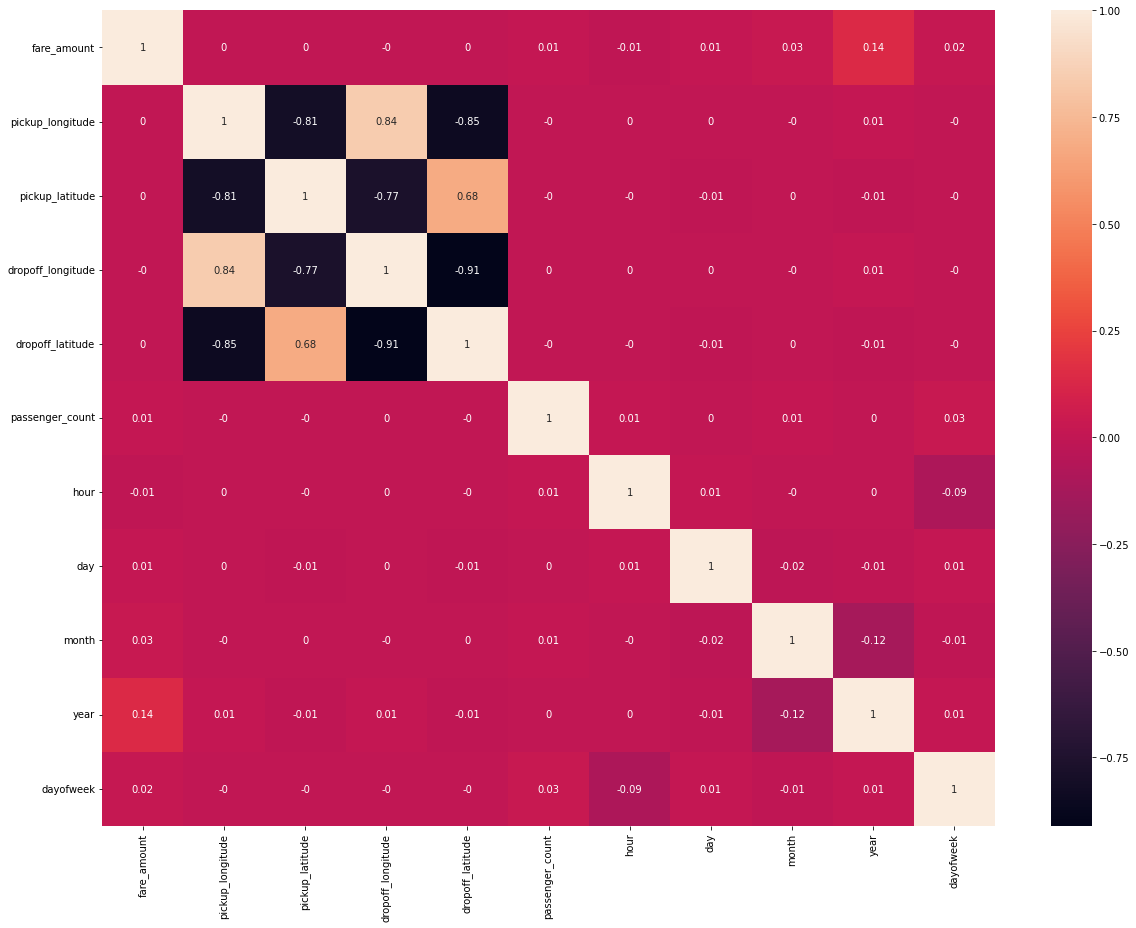

In [97]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)

In [98]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek']]
y = df['fare_amount']

In [103]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33)

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print("Intercept :", lin_reg.intercept_)             #To find the linear intercept
print("\nLinear Coefficients :", lin_reg.coef_)      #To find the linear coeeficient

print()
prediction = lin_reg.predict(x_test)                 #To predict the target values
print(prediction)
y_test

Intercept : -631.0005628374399

Linear Coefficients : [ 0.00391932 -0.00526684 -0.00476278  0.00612794  0.03099525 -0.00900294
  0.00461145  0.05064541  0.31784362  0.04393672]

[8.33772529 8.85464276 9.19090525 ... 8.35701527 8.52316657 9.61476707]


74941      3.3
7164       3.7
194691     5.0
72905     11.7
102062    11.5
          ... 
187494    18.5
92036     15.3
182804    12.5
117058     7.7
198904    13.0
Name: fare_amount, Length: 60335, dtype: float64

In [105]:
from sklearn.metrics import r2_score
print("R2 Score :", r2_score(y_test, prediction))

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

R2 Score : 0.018877931439566176
RMSE : 4.096031922315267


In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) 
# Here, n_estimators means number of trees you want to build before making the prediction
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred

array([ 4.82 ,  4.948,  6.335, ..., 13.301,  7.75 , 12.605])

In [107]:
R2_Random = r2_score(y_test,y_pred)
print("R2 Score :", R2_Random)

MSE_Random = mean_squared_error(y_test,y_pred)
RMSE_Random = np.sqrt(MSE_Random)
print("RMSE :", RMSE_Random)

R2 Score : 0.7490757654158182
RMSE : 2.071443606377793
